# Bokeh scatter plot introduction

In [22]:
%%HTML
<style>
.container { width:100% !important; }
.input{ width:60% !important;
       align: center;
      }
.text_cell{ width:70% !important;
            font-size: 16px;}
.title {align:center !important;}
</style>

<a id='index'></a>

## Index

[Back to top](#index)

- [1 Introduction](#intro)
- [2 ScatterPlot components](#comopnents)
    - [2.1 The scatter plot marker](#scatter_marker)
    - [2.2 Internal structure](#internals)
    - [2.3 Data structures](#data_structures)
        - [2.3.1 Original data](#original_data)
        - [2.3.2 Tooltip data](#tooltip_data)
        - [2.3.3 Mapper data](#mapper_data)
        - [2.3.2 Output data](#output_data)
- [3 ScatterPlot interface](#plot_interface)
   - [3.1 Data mapper](#data_mapper)
   - [3.2 Tooltip selector](#tooltip_selector)
   - [3.3 Colors in Hex format](#hex_format)

- [4 Taking a snapshot of the current plot](#snapshot)
- [5 Plotting pandas Panel and Panel4D](#plot_pandas)

<a id='introduction'></a>

# 1 Introduction

Now that we are familiar with the framework's basics, we can start showing the full capabilities of Shaolin. In order to do that I will rewiev one of the most "simple" and widely used plots in data science: The scatter plot. We provide in the dashboards section of the Shaolin framework several Dashboards suited for complex data processing, and the Bokeh Scatterplot is the one on which we are going to center this tutorial. All the individual components of this Dashboard will be explained deeply in further tutorials.

<a id='components'></a>

# 2 ScatterPlot components

<a id='scatter_marker'></a>

## 2.1 The scatter plot marker

[Back to top](#index)

A scatter plot, as we all know is a kind of plot in which we represent two datapoint vectors (x and y) against each other and assign a marker(by now just a circle) to each pair of data points. Althoug the x and y coordinates of the marker are the only two compulsory parameters, it is also possible to customize the following parameters for a circle marker:

- **x**: x coordinate of the marker.
- **y**: y coordinate of the marker.
- **size**: Marker size.
- **fill_alpha**: Transparency value of the interior of the marker.
- **fill_color**: Color of the interior of the marker.
- **line_color**: Color of the marker's border.
- **line_alpha**: Transparency of the marker's border.
- **line_width**: Width of the marker's boder.

It is possible to fully customize what data from the data structure we want to plot willn  be mapped to a marker parameter and how that mapping will be performed. In order to assign values to a marker parameter we have to follow this process:

- Select a chunk of data from your pandas data structure that has the correct shape. (In this case each parameter must be a datapoint vector)
- Select how the data will be scaled to fit in the range of values that the marker parameter can have. (For example, for the **line_width** param all the values should be between 1 and 4.)
- Select if the values of the parameter will be a mapping of the data or a default value that will be the same for all the data points. 

This means that we could theoretically plot 8 dimensional data by mapping each parameter to a coordinate of a data point, but in practise it is sometime more usefull to use more than one parameter to map the same vector of data points in order to emphatise some feature of the data we are plotting. For example, we could map the **fill_color** parameter and the **fill_alpha** parameter to the same feature so it would be easy to emphatise the higher values of the plotted vector.

<a id='internals'></a>

## 2.2 Internal structure

[Back to top](#index)

The scatter plot is a Dashboard with the following attributes:

- **data**: The pandas data structure that we will use for the plot.
- **widget**: GUI for selecting the plot parameters.
- **plot**: Bokeh plot where the data is displayed.
- **mapper**: Dashboard in charge of mapping data to every marker parameter.
- **tooltip**: Dashboard in charge of managing the information displayed on the tooltip.
- **output**: DataFrame with all the information available to the plot.
- **bokeh_source**: Bokeh DataSource that mimics the infromation contained in the source df.

In the following diagram you can se the process of how data is mapped into visual information.

<img src="scatter_data/structure.svg"></img>

For this example we will use the classic Iris dataset imported from the bokeh data samples.

In [1]:
from IPython.display import Image #this is for displaying the widgets in the web version of the notebook
from shaolin.dashboards.bokeh import ScatterPlot
from bokeh.sampledata.iris import flowers
scplot = ScatterPlot(flowers)

<a id='data_structures'></a>

## 2.3 Data structures

[Back to top](#index)

The data contained in the blocks described in the above diagram gcan be accessed the following way:

<a id='original_data'></a>

### 2.3.1 Original data

In [2]:
scplot.data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<a id='tooltip_data'></a>

### 2.3.2 Tooltip data

[Back to top](#index)

In [3]:
scplot.tooltip.output.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<a id='mapper_data'></a>

### 2.3.3 Mapper data

In [4]:
scplot.mapper.output.head()

,fill_alpha,fill_color,line_alpha,line_color,line_width,size,x,y
0,1.0,blue,1.0,black,2.0,12.0,0.000000,0.222222
1,1.0,blue,1.0,black,2.0,12.0,0.006711,0.166667
2,1.0,blue,1.0,black,2.0,12.0,0.013423,0.111111
3,1.0,blue,1.0,black,2.0,12.0,0.020134,0.083333
4,1.0,blue,1.0,black,2.0,12.0,0.026846,0.194444


<a id='output_data'></a>

### 2.3.4 output data

In [5]:
scplot.output.head()

,fill_alpha,fill_color,line_alpha,line_color,line_width,size,x,y,sepal_length,sepal_width,petal_length,petal_width,species
0,1.0,blue,1.0,black,2.0,12.0,0.000000,0.222222,5.1,3.5,1.4,0.2,setosa
1,1.0,blue,1.0,black,2.0,12.0,0.006711,0.166667,4.9,3.0,1.4,0.2,setosa
2,1.0,blue,1.0,black,2.0,12.0,0.013423,0.111111,4.7,3.2,1.3,0.2,setosa
3,1.0,blue,1.0,black,2.0,12.0,0.020134,0.083333,4.6,3.1,1.5,0.2,setosa
4,1.0,blue,1.0,black,2.0,12.0,0.026846,0.194444,5.0,3.6,1.4,0.2,setosa


<a id='plot_interface'></a>

# 3 Scatter plot Interface

[Back to top](#index)

The scatter plot Dashboard contains the bokeh scatter plot and a widget. That widget is a toggle menu that can display two Dashboards:
- Mapper: This dashboard is in charge of managing how the data is displayed.
- Tooltip: The BokehTooltip Dashboard allows to select what information will be displayed on the plot tooltips.

The complete plot interface can be displayed calling the function *show*.

As you will see, the interface layout has not been yet customized, so any suggestion regarding interface desing will be appreciated.

<a id='data_mapper'></a>

## 3.1 Data Mapper

[Back to top](#index)

This is the Dashboard that allows to customize how the data will be plotted. We will color each of its components so its easier to locate them. This is a good example of a complex Dashboard comprised of multiple Dashboards.

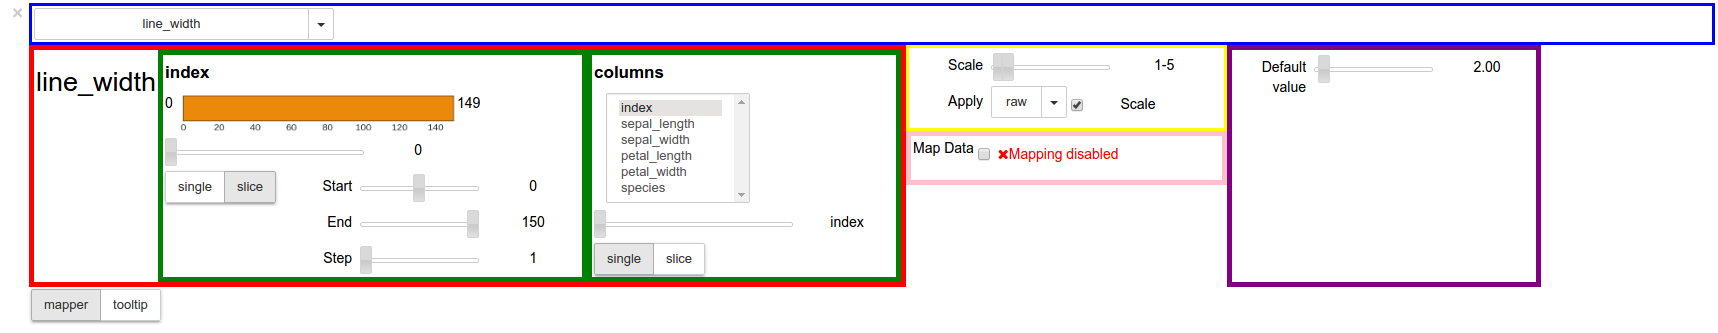

In [6]:
mapper = scplot.mapper
mapper.buttons.widget.layout.border = "blue solid"
mapper.buttons.value = 'line_width'
mapper.line_width.data_scaler.widget.layout.border = 'yellow solid'
mapper.line_width.data_slicer.widget.layout.border = 'red solid 0.4em'
mapper.line_width.data_slicer.columns_slicer.widget.layout.border = 'green solid 0.4em'
mapper.line_width.data_slicer.index_slicer.widget.layout.border = 'green solid 0.4em'
mapper.line_width.default_value.widget.layout.border = 'purple solid 0.4em'
mapper.line_width.apply_row.widget.layout.border = "pink solid 0.4em"
scplot.widget
Image(filename='scatter_data/img_1.png')

A plot mapper has the following components:
- **Marker parameter selector**(Blue): A dropdown that allows to select which marker parameter that is going to be changed.
- **Data slicer**(Red): A dashoard in charge of selecting a datapoint vector from a pandas data structure. We can slice each of the dimensions of the data structure thanks to an **AxisSlicer**(Green) Dashboard.
- **Data scaler**(Yellow): Dashboard in charge of scaling the data. Similar to the data scaler from the tutorials.
- **Activate mapping**(pink): If the value of the checkbox is True the value of the marker parameter will be the output of the scaler, otherwise it will be the **default value**(Purple) for every data point.

<a id='tooltip_selector'></a>

## 3.1 Tooltip selector

[Back to top](#index)

It is possible to choose what information from the **data** attribute of the ScatterPlot will be shown when hovering above a marker. 

In the above cell we click in the "tooltip" button of the toggleButtons in order to make the widget visible. As we can see there is a SelectMultiple widget for every column of the original DataFrame.

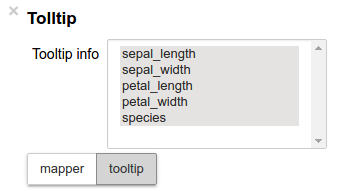

In [37]:
scplot.widget
Image(filename='scatter_data/img_2.png')

<a id='snapshot'></a>

# 4 Taking a snapshot of the current plot

[Back to top](#index)

Although it is possible to save the bokeh plot with any of the standard methods that the bokeh library offers by accessing the **plot** attribute of the ScatterPlot, shaolin offers the possibility of saving an snapshot of the plot as a shaolin widget compatible with the framework, this way it can be included in a Dashboard for displaying purposes.

This process is done by accessing the **snapshot** attribute of the scatterPlot. This way the current plot is exported and we can keep working with the ScatterPlot Dashboard in case we need to make more plots. An snapshot is an HTML widget which value is an exported *notebook_div* of the plot.

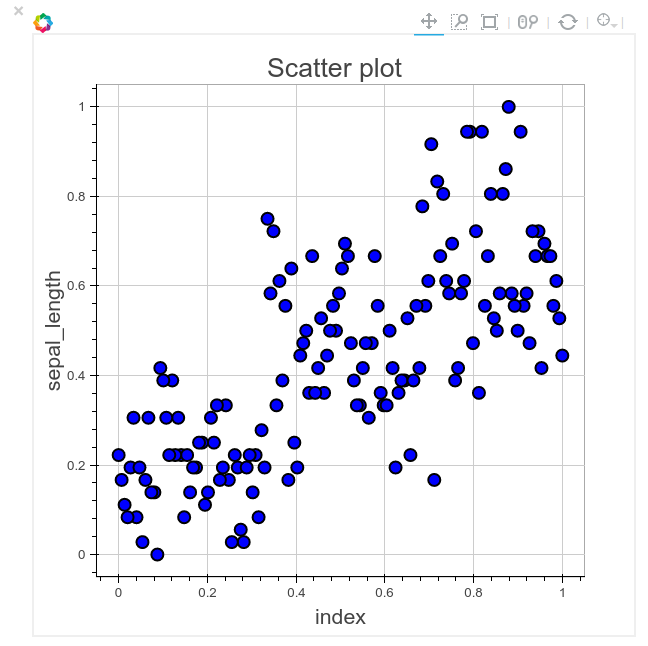

In [39]:
widget_plot = scplot.snapshot
widget_plot.widget
Image(filename='scatter_data/img_3.png')

<a id='plot_pandas'></a>

# 5 Plotting pandas Panel and Panel4D

[Back to top](#index)

It is also possible to plot a pandas Panel or a Panel4d the same way as a DataFrame. The only resctriction for now is that the axis that will be used as index must be the major_axis in case of a Panel and the items axis in case of a Panel4D. The tooltips are disabled, custom tooltips will be available in the next release.

It would be nice to have feedback on how would you like to display and select the tooltips.

In [40]:
from pandas.io.data import DataReader# I know its deprecated but i can't make the pandas_datareader work :P
import datetime
symbols_list = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)
panel = DataReader( symbols_list, start=start, end=end,data_source='yahoo')

In [41]:
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 771 (major_axis) x 5 (minor_axis)
Items axis: Open to Adj Close
Major_axis axis: 2010-01-04 00:00:00 to 2013-01-25 00:00:00
Minor_axis axis: IBM to YELP

In [ ]:
sc_panel = ScatterPlot(panel)

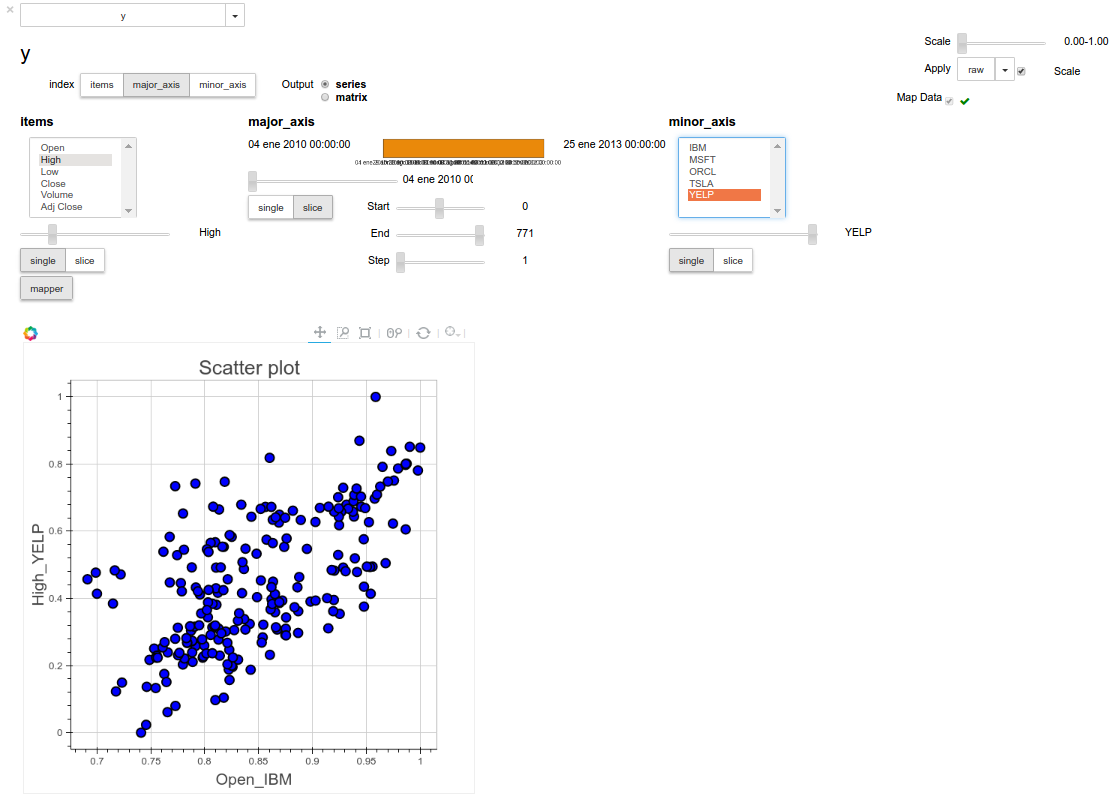

In [44]:
#sc_panel.show()
Image(filename='scatter_data/img_4.png')